In [1]:
import math
import numpy as np
import numpy.random as nr
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from __future__ import print_function
from time import time
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# PCA (Tutorial)

http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html

In [2]:
X, y = np.load('X_train.npy'), np.load('y_train.npy')

Z = np.load('X_test.npy')

n_samples, h, w = X.shape[0], 50, 37
target_names = range(7)
n_classes = 7

In [3]:
def pca_fit(X, n_components = 150):
    t0 = time()
    pca = PCA(n_components=n_components, svd_solver='randomized',
              whiten=True).fit(X)
    print("done in %0.3fs" % (time() - t0))
    return pca

In [4]:
def pca_grid_search(X, y, n_components = 150, random_state = 3244, 
                    model = SVC(class_weight='balanced'),
                    param_grid = {'C': [1, 10, 1e2, 500, 1e3, 5e3],
                                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], 
                                  'kernel': ['rbf']}):
     # validation set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state)
    
    pca = pca_fit(X_train, n_components=n_components)
    
    # tranform train and test data
    print("Projecting the input data on the eigenfaces orthonormal basis")
    t0 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("done in %0.3fs" % (time() - t0))
    
    # grid search to tune hyper-paramters
    print("Fitting the classifier to the training set")
    t0 = time()
    clf = GridSearchCV(model, param_grid, scoring='f1_micro')
    clf = clf.fit(X_train_pca, y_train)
    print("done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
    
    # test on test data
    print("Predicting people's names on the test set")
    t0 = time()
    y_pred = clf.predict(X_test_pca)
    print("done in %0.3fs" % (time() - t0))

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
    
    return (pca, clf.best_estimator_)
    
   

In [5]:
def print_labels_to_file(filename, labels):
    fo = open(filename,'w')
    fo.write('ImageId,PredictedClass\n')
    for i in range(labels.shape[0]):
        fo.write(str(i) + ',' + str(labels[i])+'\n')
    fo.close()

In [6]:
pca, clf = pca_grid_search(X, y)

done in 0.259s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.029s
Fitting the classifier to the training set
done in 16.584s
Best estimator found by grid search:
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.029s
             precision    recall  f1-score   support

          0       0.71      0.83      0.77        12
          1       0.85      0.83      0.84        48
          2       0.61      0.78      0.68        18
          3       0.92      0.85      0.88        98
          4       0.71      0.79      0.75        19
          5       0.86      0.75      0.80        16
          6       0.79      0.84      0.81        31

avg / total       0.84      0.83      0.83       242

[[10  2  0  0  0  0  0]
 [ 1 40  3  2  1  0  1

In [7]:
# fit to X, y
X_pca = pca.transform(X)
clf.fit(X_pca, y)

# print labels for test set
Z_pca = pca.transform(Z)
z_pred = clf.predict(Z_pca)
print_labels_to_file('pca_fit_to_X.csv', z_pred)

In [8]:
# try pca on X first
pca = pca_fit(X)
X_pca = pca.transform(X)
clf.fit(X_pca, y)

# print labels for test set
Z_pca = pca.transform(Z)
z_pred = clf.predict(Z_pca)
print_labels_to_file('pca_fit_to_X_v2.csv', z_pred)

done in 0.252s


## more components

In [9]:
# pca, clf = pca_grid_search(X, y, n_components = 50)

In [10]:
# pca, clf = pca_grid_search(X, y, n_components = 100)

In [11]:
# pca, clf = pca_grid_search(X, y, n_components = 300)

In [12]:
# pca, clf = pca_grid_search(X, y, n_components = 400)

## n_components: 100

In [13]:
pca, clf = pca_grid_search(X, y, n_components = 100)

# try pca on X first
pca = pca_fit(X, n_components=100)
X_pca = pca.transform(X)
clf.fit(X_pca, y)

# print labels for test set
Z_pca = pca.transform(Z)
z_pred = clf.predict(Z_pca)
print_labels_to_file('pca_fit_to_X_nc_100_v2.csv', z_pred)

done in 0.161s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.025s
Fitting the classifier to the training set
done in 11.061s
Best estimator found by grid search:
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.020s
             precision    recall  f1-score   support

          0       0.91      0.83      0.87        12
          1       0.87      0.96      0.91        48
          2       0.72      0.72      0.72        18
          3       0.93      0.93      0.93        98
          4       0.78      0.74      0.76        19
          5       0.92      0.69      0.79        16
          6       0.91      0.94      0.92        31

avg / total       0.88      0.88      0.88       242

[[10  2  0  0  0  0  0]
 [ 0 46  0  1  0  0  1]

# With transformation
https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78#.kz0cyt8sv
http://www.learnopencv.com/average-face-opencv-c-python-tutorial/

In [14]:
import dlib
import cv2

In [15]:
# get file from http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# unzip from bz2
predictor_model = "shape_predictor_68_face_landmarks.dat"
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)

In [16]:
# from http://www.learnopencv.com/average-face-opencv-c-python-tutorial/

# Compute similarity transform given two sets of two points.
# OpenCV requires 3 pairs of corresponding points.
# We are faking the third one.

def similarityTransform(inPoints, outPoints) :
    s60 = math.sin(60*math.pi/180);
    c60 = math.cos(60*math.pi/180);  
    inPts = np.copy(inPoints).tolist();
    outPts = np.copy(outPoints).tolist();
    xin = c60*(inPts[0][0] - inPts[1][0]) - s60*(inPts[0][1] - inPts[1][1]) + inPts[1][0];
    yin = s60*(inPts[0][0] - inPts[1][0]) + c60*(inPts[0][1] - inPts[1][1]) + inPts[1][1];
    inPts.append([np.int(xin), np.int(yin)]);
    xout = c60*(outPts[0][0] - outPts[1][0]) - s60*(outPts[0][1] - outPts[1][1]) + outPts[1][0];
    yout = s60*(outPts[0][0] - outPts[1][0]) + c60*(outPts[0][1] - outPts[1][1]) + outPts[1][1];
    outPts.append([np.int(xout), np.int(yout)]);
    tform = cv2.estimateRigidTransform(np.array([inPts]), np.array([outPts]), False);
    return tform;



In [17]:
def get_points(flat_images, h=h, w=w):
    points = []
    for i in range(len(flat_images)):
        image = np.uint8(flat_images[i].reshape((h,w)))
        points.append([])
        detected_faces = face_detector(image, 1)
        for j, face_rect in enumerate(detected_faces):
            pose_landmarks = face_pose_predictor(image, face_rect)
            for k in range(68): 
                point = dlib.full_object_detection.part(pose_landmarks, k)
                points[i].append((point.x, point.y))
            break
    return points

In [18]:
# adapted from http://www.learnopencv.com/average-face-opencv-c-python-tutorial/
# align eye corners at 0.3h, 0.15w/0.85w
def align_eyes(allPoints, images, h=h, w=w, n=68):
    # Eye corners
    eyecornerDst = [ (np.int(0.15 * w ), np.int(h / 3)), (np.int(0.85 * w ), np.int(h / 3)) ];
    imagesNorm = []; 
    numImages = len(images)
    numCount = 0
    # Warp images and trasnform landmarks to output coordinate system,
    # and find average of transformed landmarks.  
    for i in range(numImages):
        # dont change image if no face detected
        if len(allPoints[i]) == 0:
            imagesNorm.append(images[i])
            continue;
        # Corners of the eye in input image
        eyecornerSrc  = [ allPoints[i][36], allPoints[i][45] ] ;
        # Compute similarity transform
        tform = similarityTransform(eyecornerSrc, eyecornerDst);
        # Apply similarity transformation
        img = cv2.warpAffine(images[i], tform, (w,h));
        # Calculate location of average landmark points.
        imagesNorm.append(img);
    return imagesNorm

In [19]:
def to_image(flat_images):
    return [img.reshape((h,w)) for img in flat_images]

def image_to_np_array(images, h=h, w=w):
    array = np.zeros((len(images), h*w))
    for k in range(len(images)):
        for i in range(h):
            for j in range(w):
                array[k][i*37+j] = images[k][i][j]
    return array

In [20]:
def plot_gallery(images, titles, h=h, w=w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [21]:
X_points = get_points(X)

X_images_norm = align_eyes(X_points, to_image(X))

# testing rotation and alignment
# plot_gallery(X_images_norm, y)
# plt.show()

In [22]:
X_align = image_to_np_array(X_images_norm)
pca, clf = pca_grid_search(X_align, y)

done in 0.191s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.032s
Fitting the classifier to the training set
done in 16.315s
Best estimator found by grid search:
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.029s
             precision    recall  f1-score   support

          0       0.77      0.83      0.80        12
          1       0.88      0.94      0.91        48
          2       0.75      0.83      0.79        18
          3       0.89      0.91      0.90        98
          4       0.88      0.74      0.80        19
          5       0.93      0.88      0.90        16
          6       0.89      0.77      0.83        31

avg / total       0.87      0.87      0.87       242

[[10  1  1  0  0  0  0]
 [ 0 45  1  1  0  1  0]

In [23]:
Z_points = get_points(Z)
Z_images_norm = align_eyes(Z_points, to_image(Z))
Z_align = image_to_np_array(Z_images_norm)
# testing rotation and alignment
# plot_gallery(Z_images_norm, range(len(Z_points)))
# plt.show()

# fit to X, y
X_pca = pca.transform(X_align)
clf.fit(X_pca, y)
# print labels for test set
Z_pca = pca.transform(Z_align)
z_pred = clf.predict(Z_pca)
print_labels_to_file('transform_pca_fit_to_X.csv', z_pred)

In [24]:
pca = pca_fit(X_align)
# fit to X, y
X_pca = pca.transform(X_align)
clf.fit(X_pca, y)
# print labels for test set
Z_pca = pca.transform(Z_align)
z_pred = clf.predict(Z_pca)
print_labels_to_file('transform_pca_on_X_fit_to_X.csv', z_pred)

done in 0.263s


## more components

In [25]:
# pca, clf = pca_grid_search(X_align, y, n_components=50)

In [26]:
pca, clf = pca_grid_search(X_align, y, n_components=75)

done in 0.120s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.020s
Fitting the classifier to the training set
done in 8.697s
Best estimator found by grid search:
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.013s
             precision    recall  f1-score   support

          0       0.77      0.83      0.80        12
          1       0.84      0.98      0.90        48
          2       0.94      0.83      0.88        18
          3       0.90      0.91      0.90        98
          4       0.88      0.79      0.83        19
          5       0.83      0.62      0.71        16
          6       0.97      0.90      0.93        31

avg / total       0.89      0.88      0.88       242

[[10  2  0  0  0  0  0]
 [ 0 47  0  1  0  0  0]


In [27]:
# pca, clf = pca_grid_search(X_align, y, n_components=100)

In [28]:
# pca, clf = pca_grid_search(X_align, y, n_components=125)

In [29]:
# pca, clf = pca_grid_search(X_align, y, n_components=300)

## poly svm

In [30]:
pca, clf = pca_grid_search(X_align, y, 
                               param_grid ={'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                                              'kernel': ['poly'], 
                                              'degree': [1, 2, 3], 'coef0':[0, 1]})
pca = pca_fit(X_align)
# fit to X, y
X_pca = pca.transform(X_align)
clf.fit(X_pca, y)
# print labels for test set
Z_pca = pca.transform(Z_align)
z_pred = clf.predict(Z_pca)
print_labels_to_file('transform_pca_on_X_poly_2.csv', z_pred)

done in 0.211s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.027s
Fitting the classifier to the training set
done in 15.709s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=1,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.023s
             precision    recall  f1-score   support

          0       0.85      0.92      0.88        12
          1       0.94      0.92      0.93        48
          2       0.75      0.83      0.79        18
          3       0.90      0.94      0.92        98
          4       0.83      0.79      0.81        19
          5       0.92      0.75      0.83        16
          6       0.93      0.87      0.90        31

avg / total       0.89      0.89      0.89       242

[[11  0  1  0  0  0  0]
 [ 1 44  1  1  0  1

## adaboost on tranformed PCA

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
pca, clf = pca_grid_search(X_align,y, model=AdaBoostClassifier(),
                           param_grid = {'n_estimators': [100], 
                                         'learning_rate':[1e-2, 1]})


done in 0.206s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.027s
Fitting the classifier to the training set
done in 8.000s
Best estimator found by grid search:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=None)
Predicting people's names on the test set
done in 0.017s
             precision    recall  f1-score   support

          0       1.00      0.08      0.15        12
          1       0.74      0.67      0.70        48
          2       0.75      0.17      0.27        18
          3       0.50      0.83      0.62        98
          4       0.50      0.32      0.39        19
          5       0.25      0.06      0.10        16
          6       0.27      0.13      0.17        31

avg / total       0.54      0.53      0.48       242

[[ 1  3  0  7  0  1  0]
 [ 0 32  0 15  0  0  1]
 [ 0  0  3 14  0  0  1]
 [ 0  6  1 81  3  2  5]
 [ 0  1  0  9  6  0  3]
 [ 0  0  0 13  1  1  1]
 [ 0  1

# bagging

In [33]:
def bagging_svc(X, y, n_components = 150,
                model = SVC(C=10.0, class_weight='balanced', gamma=0.001, kernel='rbf'),
                n_estimators=100, max_samples=0.7, max_features=0.7):
    
    pca = pca_fit(X, n_components = n_components)
    
    # tranform train and test data
    print("Projecting the input data on the eigenfaces orthonormal basis")
    t0 = time()
    X_pca = pca.transform(X)
    print("done in %0.3fs" % (time() - t0))
    
    # bagging
    print("Fitting the classifier to the training set")
    t0 = time()
    clf = BaggingClassifier(model,max_samples=max_samples, max_features=max_features, n_estimators=n_estimators, oob_score=True)
    clf = clf.fit(X_pca, y)
    print("done in %0.3fs" % (time() - t0))
    print(clf.oob_score_)
    return (pca, clf)

    
def bagging_test(X, y, n_components = 150, 
                random_state = 3244, 
                model = SVC(C=10.0, class_weight='balanced', gamma=0.001, kernel='rbf'),
                n_estimators=100, max_samples=0.7, max_features=0.7):
    
    # validation set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state)
    
    pca, clf = bagging_svc(X_train, y_train,
                           n_components=n_components, 
                           model=model, n_estimators=n_estimators, 
                           max_samples=max_samples, 
                           max_features=max_features)
    
    X_test_pca = pca.transform(X_test)
    
    # test on test data
    print("Predicting people's names on the test set")
    t0 = time()
    y_pred = clf.predict(X_test_pca)
    print("done in %0.3fs" % (time() - t0))

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
    
    return (pca, clf)

In [34]:
pca, clf = bagging_test(X_align, y)
# print labels for test set
Z_pca = pca.transform(Z_align)
z_pred = clf.predict(Z_pca)
print_labels_to_file('bagging_train.csv', z_pred)

pca, clf = bagging_svc(X_align, y)
# print labels for test set
Z_pca = pca.transform(Z_align)
z_pred = clf.predict(Z_pca)
print_labels_to_file('bagging_fit_to_X.csv', z_pred)


done in 0.208s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.018s
Fitting the classifier to the training set
done in 6.828s
0.85103626943
Predicting people's names on the test set
done in 1.033s
             precision    recall  f1-score   support

          0       0.75      1.00      0.86         9
          1       0.84      0.94      0.89        33
          2       0.93      0.93      0.93        14
          3       0.90      0.92      0.91        83
          4       0.87      0.76      0.81        17
          5       1.00      0.75      0.86        16
          6       0.95      0.86      0.90        22

avg / total       0.90      0.89      0.89       194

[[ 9  0  0  0  0  0  0]
 [ 1 31  0  1  0  0  0]
 [ 0  0 13  1  0  0  0]
 [ 2  3  0 76  2  0  0]
 [ 0  0  1  2 13  0  1]
 [ 0  1  0  3  0 12  0]
 [ 0  2  0  1  0  0 19]]
done in 0.358s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.052s
Fitting the classifier to the training

In [35]:
pca, clf = bagging_test(X_align, y, max_samples=1.0, max_features=1.0)
pca, clf = bagging_test(X_align, y, max_samples=1.0, max_features=1.0, n_estimators=30)

done in 0.265s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.024s
Fitting the classifier to the training set
done in 10.941s
0.863989637306
Predicting people's names on the test set
done in 1.729s
             precision    recall  f1-score   support

          0       0.80      0.89      0.84         9
          1       0.86      0.94      0.90        33
          2       0.93      0.93      0.93        14
          3       0.92      0.95      0.93        83
          4       0.87      0.76      0.81        17
          5       1.00      0.75      0.86        16
          6       0.90      0.86      0.88        22

avg / total       0.90      0.90      0.90       194

[[ 8  1  0  0  0  0  0]
 [ 1 31  0  1  0  0  0]
 [ 0  0 13  1  0  0  0]
 [ 0  1  0 79  2  0  1]
 [ 0  0  1  2 13  0  1]
 [ 0  2  0  2  0 12  0]
 [ 1  1  0  1  0  0 19]]
done in 0.325s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.035s
Fitting the classifier to the traini

In [36]:
pca, clf = bagging_test(X_align, y, 
                        model=SVC(C=1000.0, class_weight='balanced', coef0=1,
                                degree=2, kernel='poly'),
                        max_samples=1.0, max_features=1.0, n_estimators=30)

done in 0.304s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.022s
Fitting the classifier to the training set
done in 2.988s
0.860103626943
Predicting people's names on the test set
done in 0.439s
             precision    recall  f1-score   support

          0       1.00      0.89      0.94         9
          1       0.97      0.91      0.94        33
          2       0.81      0.93      0.87        14
          3       0.88      0.95      0.91        83
          4       0.87      0.76      0.81        17
          5       0.92      0.69      0.79        16
          6       0.86      0.86      0.86        22

avg / total       0.89      0.89      0.89       194

[[ 8  0  1  0  0  0  0]
 [ 0 30  0  1  0  1  1]
 [ 0  0 13  1  0  0  0]
 [ 0  0  1 79  2  0  1]
 [ 0  0  1  2 13  0  1]
 [ 0  0  0  5  0 11  0]
 [ 0  1  0  2  0  0 19]]


In [37]:
pca, clf = bagging_test(X_align, y, 
                        model=SVC(C=1000.0, class_weight='balanced', coef0=1,
                                degree=2, kernel='poly'),
                        max_samples=1.0, max_features=1.0)

done in 0.217s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.020s
Fitting the classifier to the training set
done in 10.552s
0.871761658031
Predicting people's names on the test set
done in 1.647s
             precision    recall  f1-score   support

          0       1.00      0.89      0.94         9
          1       0.97      0.91      0.94        33
          2       0.76      0.93      0.84        14
          3       0.89      0.96      0.92        83
          4       0.86      0.71      0.77        17
          5       0.92      0.69      0.79        16
          6       0.91      0.91      0.91        22

avg / total       0.90      0.90      0.90       194

[[ 8  0  1  0  0  0  0]
 [ 0 30  0  1  0  1  1]
 [ 0  0 13  1  0  0  0]
 [ 0  0  1 80  2  0  0]
 [ 0  0  2  2 12  0  1]
 [ 0  0  0  5  0 11  0]
 [ 0  1  0  1  0  0 20]]


In [38]:
# # validation set
# # decision tree

# X_train, X_test, y_train, y_test = train_test_split(
#     X_align, y, test_size=0.25, random_state=3244)
# pca = pca_fit(X_train)
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)
# clf = DecisionTreeClassifier(class_weight='balanced')
# clf.fit(X_train_pca, y_train)
# # test on test data
# print("Predicting people's names on the test set")
# t0 = time()
# y_pred = clf.predict(X_test_pca)
# print("done in %0.3fs" % (time() - t0))

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


## neural network

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


In [40]:
def scale_pca_grid_search_nn(X, y, n_components=150,
                             param_grid={'solver': ['lbfgs'],
                                         'alpha': [1e-2, 1e-4, 1e-6],
                                         'hidden_layer_sizes': [(150,),(100,)]},
                             random_state=3244):
    # validation set
    X_train, X_test, y_train, y_test = train_test_split(
        X_align, y, test_size=0.2, random_state=3244)
    
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test) 

    pca_fit(X_train, n_components =n_components)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf = GridSearchCV(MLPClassifier(), param_grid, scoring='f1_micro')
    clf = clf.fit(X_train_pca, y_train)
    print(clf.best_estimator_)

    # test on test data
    print("Predicting people's names on the test set")
    t0 = time()
    y_pred = clf.predict(X_test_pca)
    print("done in %0.3fs" % (time() - t0))

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

    return scaler, pca, clf.best_estimator_

In [41]:

# originally tested on 1e-1, 1e-4, 1e-7

scaler, pca, clf = scale_pca_grid_search_nn(X_align, y,param_grid={'solver': ['lbfgs'],
                                         'alpha': [1e-2, 1e-3, 1e-4],
                                         'hidden_layer_sizes': [(150,),(100,),(150,50),(150,75,25)]})

done in 0.236s
MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Predicting people's names on the test set
done in 0.001s
             precision    recall  f1-score   support

          0       0.86      0.67      0.75         9
          1       0.87      1.00      0.93        33
          2       0.87      0.93      0.90        14
          3       0.90      0.93      0.91        83
          4       0.82      0.82      0.82        17
          5       1.00      0.62      0.77        16
          6       0.95      0.91      0.93        22

avg / total       0.90      0.89      0.89       194

[[ 6  2  1  0  

In [42]:
# print labels for test set
Z_scale = scaler.transform(Z_align)
Z_pca = pca.transform(Z_scale)
z_pred = clf.predict(Z_pca)
print_labels_to_file('transform_pca_nn.csv', z_pred)


In [43]:
scaler = StandardScaler()  
scaler.fit(X_align) 
X_pca = pca.transform(scaler.transform(X_align))
clf.fit(X_pca, y)
# print labels for test set
Z_scale = scaler.transform(Z_align)
Z_pca = pca.transform(Z_scale)
z_pred = clf.predict(Z_pca)
print_labels_to_file('transform_pca_nn_fit_to_X.csv', z_pred)

In [54]:
# bagging neural network
scaler = StandardScaler()  
scaler.fit(X_align) 
X_scale = scaler.transform(X_align)
#validation
bagging_test(X_scale, y, 
             model=MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
                                   beta_2=0.999, early_stopping=False, epsilon=1e-08,
                                   hidden_layer_sizes=(100,), learning_rate='constant',
                                   learning_rate_init=0.001, max_iter=200, momentum=0.9,
                                   nesterovs_momentum=True, power_t=0.5, random_state=None,
                                   shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
                                   verbose=False, warm_start=False),
             max_samples=1.0, max_features=1.0, n_estimators=30)
#fitting
pca, clf= bagging_svc(X_scale, y,
                model = MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False, epsilon=1e-08,
                                           hidden_layer_sizes=(100,), learning_rate='constant',
                                           learning_rate_init=0.001, max_iter=200, momentum=0.9,
                                           nesterovs_momentum=True, power_t=0.5, random_state=None,
                                           shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
                                           verbose=False, warm_start=False),
                n_estimators=30, max_samples=1.0, max_features=1.0)

# print labels for test set
Z_scale = scaler.transform(Z_align)
Z_pca = pca.transform(Z_scale)
z_pred = clf.predict(Z_pca)
print_labels_to_file('transform_pca_nn_bagging.csv', z_pred)

done in 0.398s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.031s
Fitting the classifier to the training set
done in 3.765s
0.873056994819
Predicting people's names on the test set
done in 0.028s
             precision    recall  f1-score   support

          0       0.80      0.89      0.84         9
          1       0.97      0.97      0.97        33
          2       0.87      0.93      0.90        14
          3       0.95      0.93      0.94        83
          4       0.84      0.94      0.89        17
          5       1.00      0.94      0.97        16
          6       0.95      0.91      0.93        22

avg / total       0.94      0.93      0.93       194

[[ 8  1  0  0  0  0  0]
 [ 1 32  0  0  0  0  0]
 [ 0  0 13  1  0  0  0]
 [ 1  0  2 77  2  0  1]
 [ 0  0  0  1 16  0  0]
 [ 0  0  0  1  0 15  0]
 [ 0  0  0  1  1  0 20]]
done in 0.329s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.031s
Fitting the classifier to the trainin

In [45]:
# # swapping pca and scaling order

# X_train, X_test, y_train, y_test = train_test_split(
#     X_align, y, test_size=0.2, random_state=3244)


# n_components = 150

# pca = pca_fit(X_train, n_components =n_components)

# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

# scaler = StandardScaler()  
# scaler.fit(X_train_pca)  
# X_train_scale = scaler.transform(X_train_pca)
# X_test_scale = scaler.transform(X_test_pca)


# param_grid = {'solver': ['lbfgs'],
#               'alpha': [1e-3, 5e-3, 1e-4],
#               'hidden_layer_sizes': [(150,),(100,),(150,50),(150,75,25)],
#               'early_stopping': [True, False]}
# clf = GridSearchCV(MLPClassifier(), param_grid, scoring='f1_micro')
# clf = clf.fit(X_train_scale, y_train)
# print(clf.best_estimator_)
    
# # test on test data
# print("Predicting people's names on the test set")
# t0 = time()
# y_pred = clf.predict(X_test_scale)
# print("done in %0.3fs" % (time() - t0))

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# on first x derivative

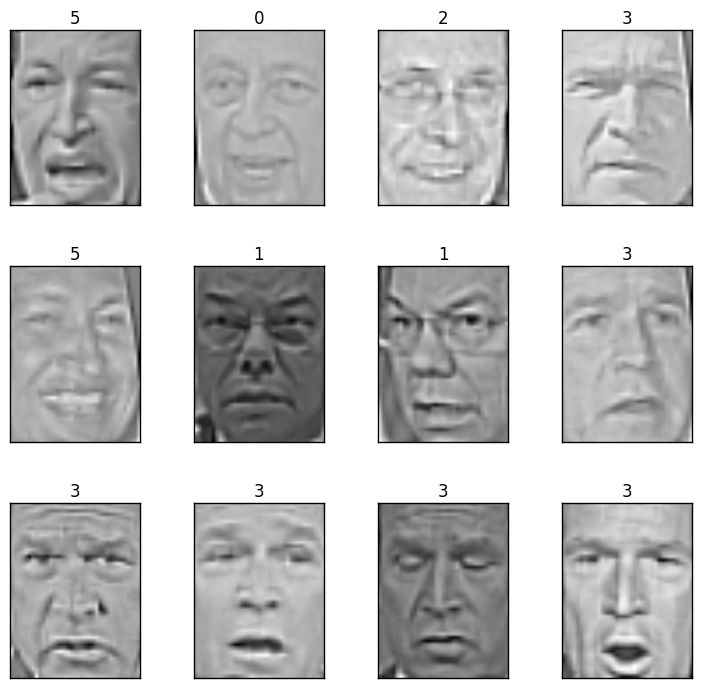

done in 0.227s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.025s
Fitting the classifier to the training set
done in 16.844s
Best estimator found by grid search:
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.032s
             precision    recall  f1-score   support

          0       0.90      0.75      0.82        12
          1       0.88      0.88      0.88        48
          2       0.68      0.83      0.75        18
          3       0.86      0.91      0.89        98
          4       0.88      0.74      0.80        19
          5       0.64      0.56      0.60        16
          6       0.93      0.87      0.90        31

avg / total       0.85      0.85      0.85       242

[[ 9  0  0  0  0  3  0]
 [ 0 42  2  2  0  1  1]

In [46]:

X_images_filter = np.zeros((n_samples,50,37))
X_images_derivX = np.zeros((n_samples,50,37))
X_images_derivY = np.zeros((n_samples,50,37))

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

for i in range(n_samples):
    X_images_filter[i][:][:]= cv2.filter2D(X_images_norm[i], -1, kernel)
    X_images_derivX[i][:][:]=cv2.Scharr(X_images_norm[i],-1,1,0)
    X_images_derivY[i][:][:]=cv2.Scharr(X_images_norm[i],-1,0,1)
    
plot_gallery(X_images_filter, y)
plt.show()

X_align_filter = image_to_np_array(X_images_filter)
X_align_derivX = image_to_np_array(X_images_derivX)
X_align_derivY = image_to_np_array(X_images_derivY)

pca, clf = pca_grid_search(X_align_filter, y)
pca, clf = pca_grid_search(X_align_derivX, y)
pca, clf = pca_grid_search(X_align_derivY, y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_align_derivY, y, test_size=0.2, random_state=3244)

n_components = 150

pca = pca_fit(X_train, n_components =n_components)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


param_grid = {'solver': ['lbfgs'],
              'alpha': [1e-2, 1e-4, 1e-6],
              'hidden_layer_sizes': [(150,),(100,),(150,50),(150,75,25)]}
clf = GridSearchCV(MLPClassifier(), param_grid, scoring='f1_micro')
clf = clf.fit(X_train_pca, y_train)
print(clf.best_estimator_)
    
# test on test data
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

done in 0.229s
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Predicting people's names on the test set
done in 0.001s
             precision    recall  f1-score   support

          0       1.00      0.89      0.94         9
          1       0.83      0.88      0.85        33
          2       0.87      0.93      0.90        14
          3       0.92      0.92      0.92        83
          4       0.93      0.76      0.84        17
          5       0.81      0.81      0.81        16
          6       0.78      0.82      0.80        22

avg / total       0.88      0.88      0.88       194

[[ 8  1  0  0

In [48]:
clf = clf.best_estimator_
# bagging neural network with derivY
pca, clf = bagging_test(X_align_derivY, y, 
                        model=clf,
                        max_samples=1.0, max_features=1.0, n_estimators=30)

done in 0.228s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.023s
Fitting the classifier to the training set
done in 4.313s
0.874352331606
Predicting people's names on the test set
done in 0.037s
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.91      0.94      0.93        33
          2       0.78      1.00      0.88        14
          3       0.90      0.92      0.91        83
          4       0.93      0.76      0.84        17
          5       0.87      0.81      0.84        16
          6       0.95      0.86      0.90        22

avg / total       0.91      0.90      0.90       194

[[ 9  0  0  0  0  0  0]
 [ 0 31  0  0  0  2  0]
 [ 0  0 14  0  0  0  0]
 [ 0  3  3 76  1  0  0]
 [ 0  0  1  3 13  0  0]
 [ 0  0  0  2  0 13  1]
 [ 0  0  0  3  0  0 19]]


## without PCA

In [49]:
# scaler = StandardScaler()  
# scaler.fit(X)
# X_scale = scaler.transform(X)

# param_grid = {'solver': ['lbfgs'],
#               'alpha': [1e-1, 1e-4, 1e-7],
#               'hidden_layer_sizes': [(500,), (300,), (150,)]}
# clf = GridSearchCV(MLPClassifier(), param_grid, scoring='f1_micro')
# clf = clf.fit(X_scale, y)
# print(clf.best_estimator_)
# print(clf.best_score_)

In [50]:
# alpha: 1e-1, 1e-4, 1e-7, hidden_layer_sizes: (500,), (100,)
# alpha: 1e-3, 1e-4, 1e-5, hls: (400,), (300,), (200,)

# scaler = StandardScaler()  
# scaler.fit(X_align)
# X_scale = scaler.transform(X_align)

# param_grid = {'solver': ['lbfgs'],
#               'alpha': [1e-1, 1e-3, 1e-5],
#               'hidden_layer_sizes': [(300,),(50,50,50,50,50)]}
# clf = GridSearchCV(MLPClassifier(), param_grid, scoring='f1_micro')
# clf = clf.fit(X_scale, y)
# print(clf.best_estimator_)
# print(clf.best_score_)

# Testing without PCA & transformation

In [51]:
# # validation set
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=3244)
# param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#               'kernel': ['poly'], 
#               'degree': [1, 2, 3],
#               'coef0' : [0, 1, 2]}
# clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, scoring='f1_micro')
# clf = clf.fit(X_train, y_train)
# print("Best estimator found by grid search:")
# print(clf.best_estimator_)


In [52]:
# # test on test data
# print("Predicting people's names on the test set")
# t0 = time()
# y_pred = clf.predict(X_test)
# print("done in %0.3fs" % (time() - t0))

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

In [53]:
# clf = clf.best_estimator_
# clf.fit(X,y)
# print_labels_to_file('poly_fit_to_X.csv', clf.predict(Z))